In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [133]:
df = pd.read_csv('life_expectancy.csv')
df.head()

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51


In [134]:
df.isnull().sum()

Country                                 0
Sum of Females  Life Expectancy         0
Sum of Life Expectancy  (both sexes)    0
Sum of Males  Life Expectancy           0
dtype: int64

In [135]:
df.columns

Index(['Country', 'Sum of Females  Life Expectancy',
       'Sum of Life Expectancy  (both sexes)',
       'Sum of Males  Life Expectancy'],
      dtype='object')

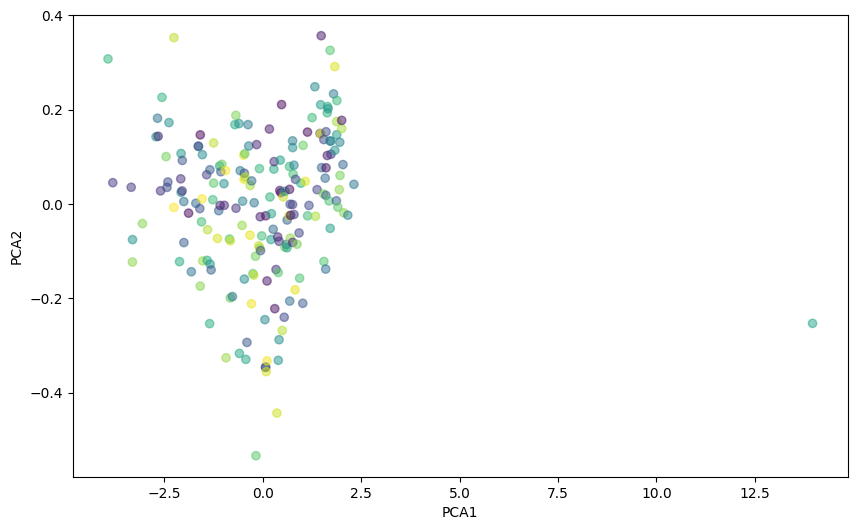

In [136]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df[['Sum of Females  Life Expectancy',
        'Sum of Life Expectancy  (both sexes)',
        'Sum of Males  Life Expectancy']]

y = le.fit_transform(df['Country'])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

pca.explained_variance_ratio_

pca_df = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2'])
pca_df['Country'] = df['Country']


plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, alpha=0.5)


plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [137]:
df.iloc[x_pca[:,0].argmax()]

Country                                 Micronesia
Sum of Females  Life Expectancy             149.22
Sum of Life Expectancy  (both sexes)        143.28
Sum of Males  Life Expectancy               137.64
Name: 199, dtype: object

In [138]:
df.iloc[x_pca[:,0].argmin()]


Country                                 Nigeria
Sum of Females  Life Expectancy           54.94
Sum of Life Expectancy  (both sexes)      54.64
Sum of Males  Life Expectancy             54.33
Name: 1, dtype: object